In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd
from PIL import Image
from scipy import ndimage

import h5py

import tensorflow as tf
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable


import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


np.random.seed(1)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


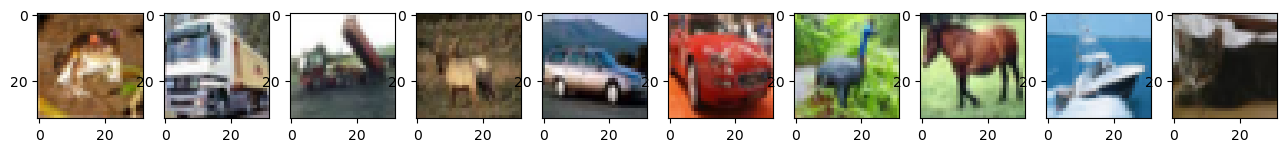

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:10]]))

f, axarr = plt.subplots(1, 10)
f.set_size_inches(16, 6)

for i in range(10):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [4]:
x_train = tf.data.Dataset.from_tensor_slices(X_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)

x_test = tf.data.Dataset.from_tensor_slices(X_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

In [5]:
print(next(iter(x_train)))

tf.Tensor(
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]], shape=(32, 32, 3), dtype=uint8)


In [6]:
x_train

<TensorSliceDataset element_spec=TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None)>

In [7]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, )
    and normalize its components.
    
    Arguments
    image - Tensor.
    
    Returns: 
    result -- Transformed tensor 
    """
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1,])
    return image

In [8]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

In [9]:
new_train

<MapDataset element_spec=TensorSpec(shape=(3072,), dtype=tf.float32, name=None)>

In [10]:
print(next(iter(new_train)))

tf.Tensor([0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295], shape=(3072,), dtype=float32)


In [11]:
new_test 

<MapDataset element_spec=TensorSpec(shape=(3072,), dtype=tf.float32, name=None)>

In [12]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes X to be a random tensor of shape (3,1)
            Initializes W to be a random tensor of shape (4,3)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- Y = WX + b 
    """

    np.random.seed(1)
    
    """
    Note, to ensure that the "random" numbers generated match the expected results,
    please create the variables in the order given in the starting code below.
    (Do not re-arrange the order).
    """
    # (approx. 4 lines)
    # X = ...
    # W = ...
    # b = ...
    # Y = ...
    # YOUR CODE STARTS HERE
    X = tf.constant(np.random.randn(3,1), name = "X")
    W =  tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W, X),b) 
    

    # YOUR CODE ENDS HERE
    return Y

In [13]:
result = linear_function()
print(result)

assert type(result) == EagerTensor, "Use the TensorFlow API"
assert np.allclose(result, [[-2.15657382], [ 2.95891446], [-1.08926781], [-0.84538042]]), "Error"
print("\033[92mAll test passed")


tf.Tensor(
[[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]], shape=(4, 1), dtype=float64)
All test passed


In [14]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    a -- (tf.float32) the sigmoid of z
    """
    # tf.keras.activations.sigmoid requires float16, float32, float64, complex64, or complex128.
    
    # (approx. 2 lines)
    # z = ...
    # a = ...
    # YOUR CODE STARTS HERE
    z =  tf.cast(z, tf.float32)
    a = tf.keras.activations.sigmoid(z)
    
    # YOUR CODE ENDS HERE
    return a


In [15]:
# GRADED FUNCTION: one_hot_matrix
def one_hot_matrix(label, depth=11):
    """
    Computes the one hot encoding for a single label
    
    Arguments:
        label --  (int) Categorical labels
        depth --  (int) Number of different classes that label can take
    
    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    # (approx. 1 line)
    # one_hot = None(None(None, None, None), shape=[-1, ])
    # YOUR CODE STARTS HERE
    one_hot = tf.reshape(tf.one_hot(label,depth,axis=0) , shape= [-1,])
    
    # YOUR CODE ENDS HERE
    return one_hot

In [16]:
new_y_test = y_test.map(one_hot_matrix)
new_y_train = y_train.map(one_hot_matrix)


In [17]:
new_y_test

<MapDataset element_spec=TensorSpec(shape=(11,), dtype=tf.float32, name=None)>

In [18]:
new_y_train

<MapDataset element_spec=TensorSpec(shape=(11,), dtype=tf.float32, name=None)>

In [41]:


def initialize_parameters():
    """
    Initializes parameters to build a neural network with TensorFlow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """                       
    initializer = tf.keras.initializers.GlorotNormal(seed=1)   

    W1 = tf.Variable(initializer(shape=(48,3072)))          
    b1 = tf.Variable(initializer(shape=(48,1)))
    W2 = tf.Variable(initializer(shape=(24,48)))
    b2 = tf.Variable(initializer(shape=(24,1)))
    W3 = tf.Variable(initializer(shape=(11,24)))
    b3 = tf.Variable(initializer(shape=(11,1)))


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [20]:
parameters = initialize_parameters()

In [21]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.math.add(tf.linalg.matmul(W1,X),b1)
    A1 = tf.keras.activations.relu(Z1)
    Z2 = tf.math.add(tf.linalg.matmul(W2,A1),b2)
    A2 = tf.keras.activations.relu(Z2)
    Z3 = tf.math.add(tf.linalg.matmul(W3,A2),b3)
    
    # YOUR CODE ENDS HERE
    
    return Z3

In [22]:
# GRADED FUNCTION: compute_total_loss 

def compute_total_loss(logits, labels):
    """
    Computes the total loss
    
    Arguments:
    logits -- output of forward propagation (output of the last LINEAR unit), of shape (6, num_examples)
    labels -- "true" labels vector, same shape as Z3
    
    Returns:
    total_loss - Tensor of the total loss value
    """
    
    #(1 line of code)
    # remember to set `from_logits=True`
    # total_loss = ...
    # YOUR CODE STARTS HERE
    total_loss = tf.reduce_sum(tf.keras.losses.categorical_crossentropy(tf.transpose(labels),tf.transpose(logits),from_logits=True))
    
    # YOUR CODE ENDS HERE
    return total_loss

In [37]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 10 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    costs = []                                        # To keep track of the cost
    train_acc = []
    test_acc = []
    
    # Initialize your parameters
    #(1 line)
    parameters = initialize_parameters()

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    # The CategoricalAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))
    
    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()
    
    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)
    #X_train = X_train.batch(minibatch_size, drop_remainder=True).prefetch(8)# <<< extra step    
    #Y_train = Y_train.batch(minibatch_size, drop_remainder=True).prefetch(8) # loads memory faster 

    # Do the training loop
    for epoch in range(num_epochs):

        epoch_total_loss = 0.
        
        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_states()
        
        for (minibatch_X, minibatch_Y) in minibatches:
            
            with tf.GradientTape() as tape:
                # 1. predict
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)

                # 2. loss
                minibatch_total_loss = compute_total_loss(Z3, tf.transpose(minibatch_Y))

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            
            trainable_variables = [W1, b1, W2, b2, W3, b3]
            grads = tape.gradient(minibatch_total_loss, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_total_loss += minibatch_total_loss
        
        # We divide the epoch total loss over the number of samples
        epoch_total_loss /= m

        # Print the cost every 10 epochs
        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_total_loss))
            print("Train accuracy:", train_accuracy.result())
            
            # We evaluate the test set every 10 epochs to avoid computational overhead
            for (minibatch_X, minibatch_Y) in test_minibatches:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                test_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            print("Test_accuracy:", test_accuracy.result())

            costs.append(epoch_total_loss)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_states()


    return parameters, costs, train_acc, test_acc

In [30]:
parameters, costs, train_acc, test_acc = model(new_train, new_y_train, new_test, new_y_test, num_epochs=100)

Cost after epoch 0: 2.064527
Train accuracy: tf.Tensor(0.25932, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.3323, shape=(), dtype=float32)
Cost after epoch 10: 1.584025
Train accuracy: tf.Tensor(0.44034, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4337, shape=(), dtype=float32)
Cost after epoch 20: 1.483169
Train accuracy: tf.Tensor(0.477, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4635, shape=(), dtype=float32)
Cost after epoch 30: 1.426441
Train accuracy: tf.Tensor(0.4973, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4704, shape=(), dtype=float32)
Cost after epoch 40: 1.385946
Train accuracy: tf.Tensor(0.51268, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4772, shape=(), dtype=float32)
Cost after epoch 50: 1.353472
Train accuracy: tf.Tensor(0.52336, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4797, shape=(), dtype=float32)
Cost after epoch 60: 1.326629
Train accuracy: tf.Tensor(0.53294, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0

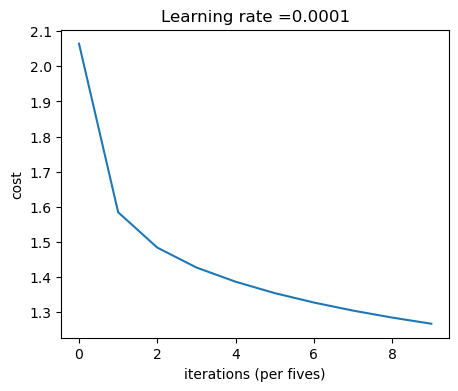

In [31]:
# Plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()


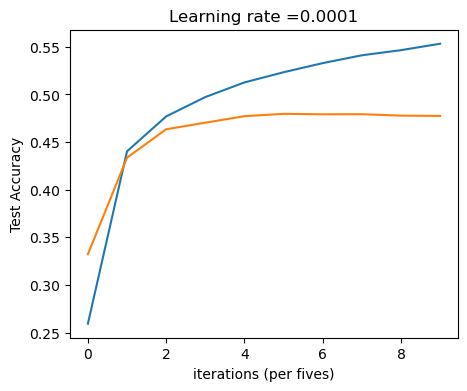

In [32]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.show()


In [43]:
parameters, costs, train_acc, test_acc = model(new_train, new_y_train, new_test, new_y_test, num_epochs=100)

Cost after epoch 0: 2.011949
Train accuracy: tf.Tensor(0.27594, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.3311, shape=(), dtype=float32)
Cost after epoch 10: 1.576197
Train accuracy: tf.Tensor(0.44448, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4348, shape=(), dtype=float32)
Cost after epoch 20: 1.471011
Train accuracy: tf.Tensor(0.48138, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4647, shape=(), dtype=float32)
Cost after epoch 30: 1.410927
Train accuracy: tf.Tensor(0.5032, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4764, shape=(), dtype=float32)
Cost after epoch 40: 1.368425
Train accuracy: tf.Tensor(0.51858, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4816, shape=(), dtype=float32)
Cost after epoch 50: 1.334050
Train accuracy: tf.Tensor(0.53084, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.4813, shape=(), dtype=float32)
Cost after epoch 60: 1.306579
Train accuracy: tf.Tensor(0.53914, shape=(), dtype=float32)
Test_accuracy: tf.Tensor